In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'scin_dataset.csv')
df.head()

,Unnamed: 0,age_group,sex_at_birth,fitzpatrick_scale,related_category,condition_duration,image_name,image_shot,combined_race,image_sufficiency,weighted_skin_condition_label,dermatologist_gradable_fitzpatrick_diagnosis,monk_skin_tone_label_india,monk_skin_tone_label_us,textures,body_parts,condition_symptoms,other_symptoms,dermatologist_fitzpatrick_diagnosis,Expected Condition
0,0,age_unknown,unspecified,fst3,rash,one day,-3205742176803893704.png,close up,white,quality sufficient,"{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,2.0,1.0,raised or bumpy,foot top or side,pain,no relevant symptoms,FST2,Inflicted skin lesions
1,1,age_unknown,unspecified,fst3,other issue description,unknown,-4762289084741430925.png,close up,white,quality sufficient,"{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,...",YES,3.0,3.0,raised or bumpy,leg,itching,no relevant symptoms,FST1,Prurigo nodularis
2,2,age_18_to_29,male,none identified,other issue description,one to four weeks,-4027806997035329030.png,close up,hispanic latino or spanish origin,quality sufficient,"{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul...",YES,3.0,4.0,rough or flaky,arm,pain,no relevant symptoms,FST4,Impetigo
3,3,age_unknown,unspecified,fst3,other issue description,one day,-5332065579713135540.png,at distance,white,quality insufficient,{},NO,2.0,4.0,rough or flaky,palm,pain,no relevant symptoms,FST2,NaN
4,4,age_40_to_49,female,fst3,rash,one day,-3799298995660217860.png,at an angle,white,quality sufficient,"{'Lichen planus/lichenoid eruption': 0.33, 'Fo...",YES,1.0,1.0,flat,foot top or side,itching,no relevant symptoms,FST1,Lichen planus/lichenoid eruption


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    5033 non-null   int64  
 1   age_group                                     5032 non-null   object 
 2   sex_at_birth                                  5032 non-null   object 
 3   fitzpatrick_scale                             5033 non-null   object 
 4   related_category                              5033 non-null   object 
 5   condition_duration                            5033 non-null   object 
 6   image_name                                    5033 non-null   object 
 7   image_shot                                    5033 non-null   object 
 8   combined_race                                 5033 non-null   object 
 9   image_sufficiency                             5033 non-null   o

In [135]:
# create a function that delete the records from the df that doesn't have the image in the image folder from the column image_name
def delete_records(df):
    import os
    for index, row in df.iterrows():
        if not os.path.exists('images/' + row['image_name']):
            df.drop(index, inplace=True)
    return df

df = delete_records(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5032 entries, 0 to 5032
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    5032 non-null   int64  
 1   age_group                                     5031 non-null   object 
 2   sex_at_birth                                  5031 non-null   object 
 3   fitzpatrick_scale                             5032 non-null   object 
 4   related_category                              5032 non-null   object 
 5   condition_duration                            5032 non-null   object 
 6   image_name                                    5032 non-null   object 
 7   image_shot                                    5032 non-null   object 
 8   combined_race                                 5032 non-null   object 
 9   image_sufficiency                             5032 non-null   object

In [136]:
# validate that each record has an image in the images folder
import os
for i in range(len(df)):
    if not os.path.isfile('images/' + df['image_name'].iloc[i]):
        print('image not found')
        

In [137]:
# preprocess the image data
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

def preprocess_image(image_path):
    img = image.load_img('images/' + image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# preprocess the images
images = np.vstack([preprocess_image(image_path) for image_path in df['image_name']])

# get the shape of the images
images.shape



(5032, 224, 224, 3)

-2891504725451213651.png
-5851164006551319638.png
-176291023421890680.png
-4353222409944859609.png
-1599719769373422275.png
-8807649793518919678.png
-5949315841433628424.png
-5829014514852281006.png
3845787053309713642.png
-6418979269415442422.png


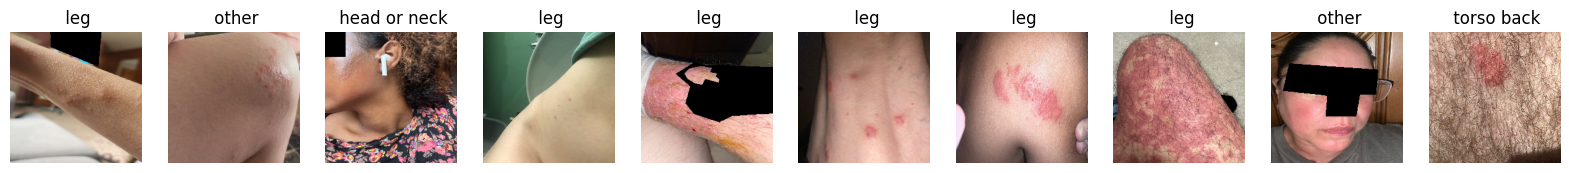

In [138]:
# display a 10 random images with its 'body_parts' label but ensure that the 'image_1_path' is same as the image name and also show the image name in a printed list
import random
random_images = random.sample(range(0, len(df)), 10)
fig, ax = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    ax[i].imshow(images[random_images[i]].squeeze().astype('uint8'))
    ax[i].set_title(df['body_parts'].iloc[random_images[i]])
    ax[i].axis('off')
    print(df['image_name'].iloc[random_images[i]])
    
        

In [139]:
# Correctly loadad images sample
# 2034844842573993364.png ----> Leg
# -6754223996189969134.png ---> arm
# 4091225911888174490.png ---> arm
# -4649063046758807338.png ---> leg
# -6544442737462623993.png --> other (face)
# -6480598833319500800.png --> torso back
# -2197355568033743807.png --> head or neck
# -1240400659890187479.png --> torso front
# -4328676342954471143.png --> torso back
# -5609658706270241785.png --> arm
# 4325542435903226725.png ---> foot top or side
# -3779989361448224309.png --> back or hand
# -1172506192366462495.png --> torso front
# -773894958411105641.png --> palm
# -3205742176803893704.png --> foot top or side
# -4639090956934471841.png --> head or neck
# -1153384974921559234.png --> arm
# -4893312442758095455.png -- leg
# -1943055598691963873.png --> head or neck
# -7030958736860719929.png --> palm
# -4335509512864210611.png -- > leg
# -3796420587199097151.png --> back or hand
# -923054950838727613.png --> head or neck
# -7935950081089116729.png --> head or neck
# -446206036030978724.png --> other

In [140]:
val_df =pd.read_csv(r'val_scin.csv')
val_df = val_df.dropna(subset=['Expected Condition'])
val_df.reset_index(drop=True, inplace=True)

create a function that delete the records from the df that doesn't have the image in the image folder from the column image_name

validate that each record has an image in the images folder

preprocess the image data

get 15 record of samples that is valid 

create another dataframe called 'Val_samples' to put it into the research

In [141]:
val_df.head(20)

,age_group,sex_at_birth,fitzpatrick_scale,related_category,condition_duration,image_name,image_shot,combined_race,image_sufficiency,weighted_skin_condition_label,dermatologist_gradable_fitzpatrick_diagnosis,monk_skin_tone_label_india,monk_skin_tone_label_us,textures,body_parts,condition_symptoms,other_symptoms,dermatologist_fitzpatrick_diagnosis,Expected Condition
0,age_unknown,unspecified,fst3,rash,one day,-3205742176803893704.png,close up,white,quality sufficient,"{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,2,1,raised or bumpy,foot top or side,pain,no relevant symptoms,FST2,Inflicted skin lesions
1,age_60_to_69,female,fst4,rash,less than one week,-4649063046758807338.png,at distance,white,quality sufficient,"{'Eczema': 0.67, 'Xerosis': 0.33}",YES,3,3,raised or bumpy,leg,increasing size,no relevant symptoms,FST3,Eczema
2,age_18_to_29,male,fst3,rash,one day,-7935950081089116729.png,at distance,white,quality sufficient,"{'Acne': 0.67, 'Irritant Contact Dermatitis': ...",YES,3,4,rough or flaky,head or neck,itching,no relevant symptoms,FST3,Acne
3,age_unknown,unspecified,fst3,rash,more than five years,-446206036030978724.png,close up,white,quality sufficient,"{'Intertrigo': 0.5, 'granular parakeratosis': ...",YES,2,2,flat,other,burning,no relevant symptoms,FST4,Intertrigo
4,age_unknown,unspecified,fst5,rash,less than one week,-6754223996189969134.png,at an angle,two or more after mitigation,quality sufficient,"{'Impetigo': 0.5, 'Allergic Contact Dermatitis...",YES,4,6,raised or bumpy,arm,itching,no relevant symptoms,FST5,Impetigo
5,age_50_to_59,female,fst1,rash,less than one week,4091225911888174490.png,close up,white,quality sufficient,"{'Photodermatitis': 0.25, 'Eczema': 0.25, 'Dru...",YES,2,2,fluid filled,arm,pain,no relevant symptoms,FST1,Drug Rash
6,age_unknown,male,fst4,other issue description,three to twelve months,-3779989361448224309.png,at distance,asian,quality sufficient,"{'Eczema': 0.4, 'Tinea': 0.2, 'Xerosis': 0.4}",YES,3,5,rough or flaky,back of hand,pain,no relevant symptoms,FST3,Eczema
7,age_unknown,unspecified,fst3,other issue description,unknown,-4893312442758095455.png,at distance,white,quality sufficient,{'Allergic Contact Dermatitis': 1.0},YES,3,2,raised or bumpy,leg,itching,no relevant symptoms,FST3,Allergic Contact Dermatitis
8,age_30_to_39,female,none identified,acne,one to three months,-6544442737462623993.png,close up,asian,quality sufficient,{'Acne': 1.0},YES,2,3,rough or flaky,other,no relevant experience,no relevant symptoms,FST4,Acne
9,age_unknown,unspecified,fst2,pigmentary problem,one to four weeks,-3796420587199097151.png,close up,two or more after mitigation,quality sufficient,"{'Eczema': 0.55, 'Irritant Contact Dermatitis'...",YES,4,5,rough or flaky,back of hand,pain,no relevant symptoms,FST4,Eczema


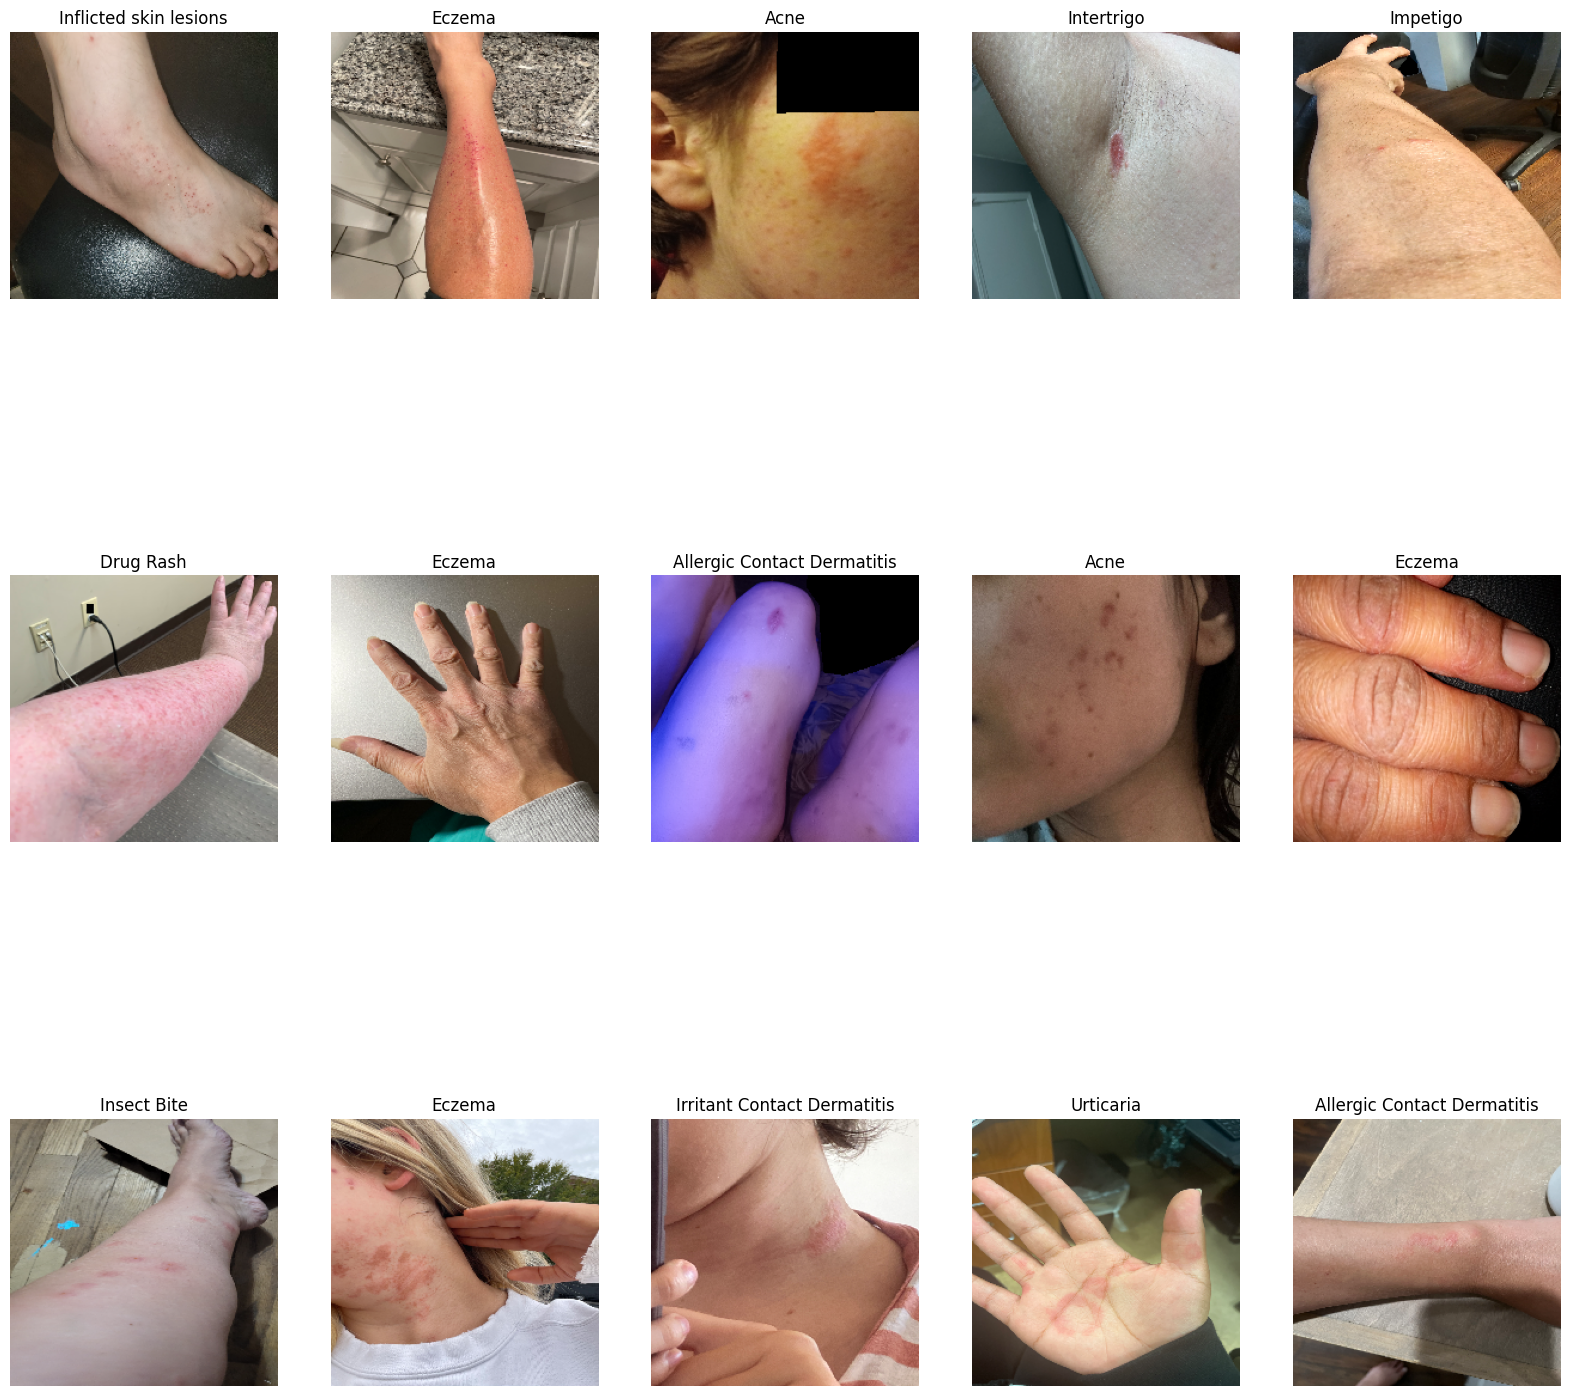

In [142]:
# show first 15 images from the validation dataset with its records each 5 in a row 
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for i in range(15):
    img = image.load_img('images/' + val_df['image_name'].iloc[i], target_size=(224, 224))
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].set_title(val_df['Expected Condition'].iloc[i])
    ax[i//5, i%5].axis('off')
    
    


In [143]:
# save those 15 image in a folder called val_images
import os
if not os.path.exists('val_images'):
    os.mkdir('val_images')
for i in range(15):
    img = image.load_img('images/' + val_df['image_name'].iloc[i], target_size=(224, 224))
    img.save('val_images/' + val_df['image_name'].iloc[i])

In [146]:
records_df =   val_df[['age_group', 'sex_at_birth', 'combined_race', 'image_name', 'image_shot', 'fitzpatrick_scale', 'textures', 'body_parts', 'condition_symptoms', 'other_symptoms', 'related_category', 'condition_duration', 'dermatologist_fitzpatrick_diagnosis', 'Expected Condition']]
records_df.to_csv('Val_Samples.csv', index=False)